<a href="https://colab.research.google.com/github/ameliachoi/python-ml-guide/blob/main/learningspoons%2B04%2Bclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Clustering 클러스터링

## Clustering list
+ k-means Clustering
+ Hierarchical Clustering
+ DBSCAN

## Evaluation
+ Silhouette

---

In [6]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_wine
wine = load_wine()

In [8]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [10]:
data = pd.DataFrame(data, columns=columns)
data.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [11]:
data.shape

(178, 13)

In [12]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

### preprocessing

In [14]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [15]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(2)
data = pca.fit_transform(data)

In [16]:
data.shape

(178, 2)

----

### K-Means Clustering

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [18]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
cluster = kmeans.predict(data)

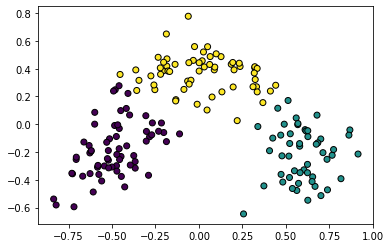

In [20]:
plt.scatter(data[:, 0], data[:, 1],
            c=cluster,
            linewidth=1,
            edgecolor='black')
plt.show()

### Hierarchical Clustering
* KMeans처럼 별도로 클러스터 개수를 지정할 필요 없음

1) Single Linkage

In [21]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3,
                                            linkage='single')

In [22]:
single_cluster = single_clustering.fit_predict(data)

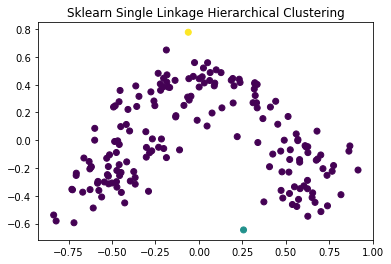

In [23]:
plt.scatter(data[:, 0], data[:, 1], c=single_cluster)
plt.title('Sklearn Single Linkage Hierarchical Clustering')
plt.show()

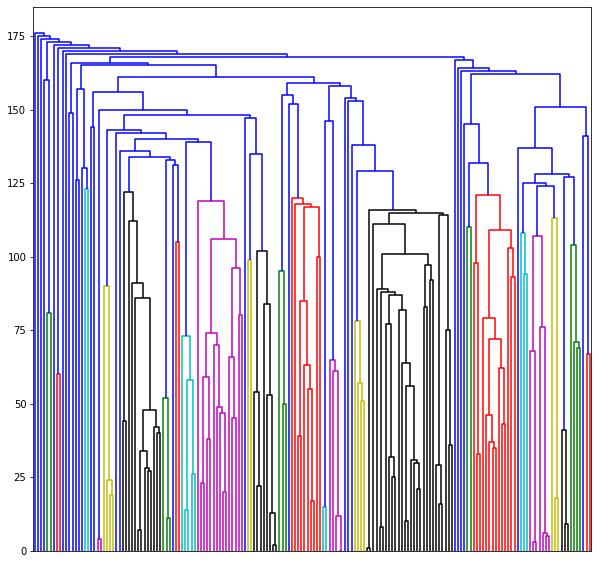

In [25]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

# hierarchical clustering의 자식 노드
children = single_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기 위한 연결 메트릭스를 생성합니다
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그린다
dendrogram(linkage_matrix, p = len(data),
           labels = single_cluster,
           show_contracted = True,
           no_labels = True)

plt.show()

2) Complete Linkage

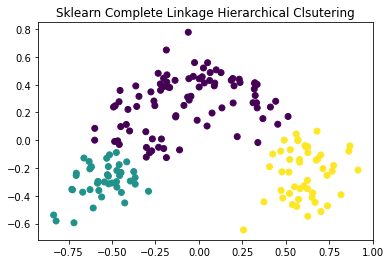

In [26]:
complete_clustering = AgglomerativeClustering(n_clusters=3,
                                              linkage='complete')

complete_cluster = complete_clustering.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c = complete_cluster)
plt.title('Sklearn Complete Linkage Hierarchical Clsutering')
plt.show()

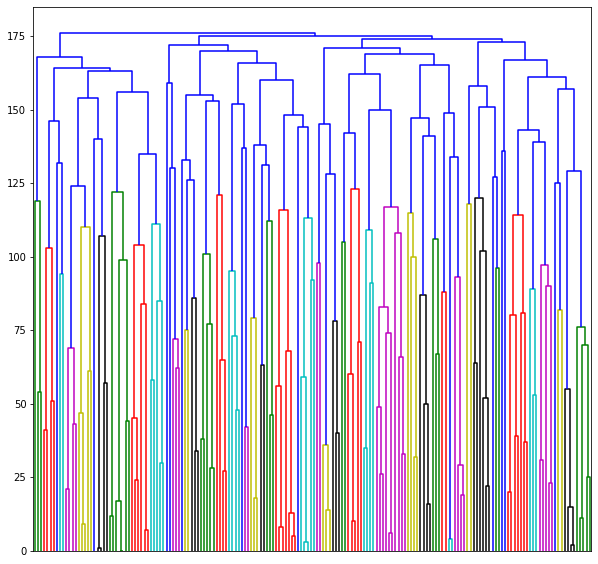

In [27]:
# 덴드로그램 

from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = complete_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = complete_cluster, 
           show_contracted=True, no_labels = True,)
plt.show()

3) Average Linkage

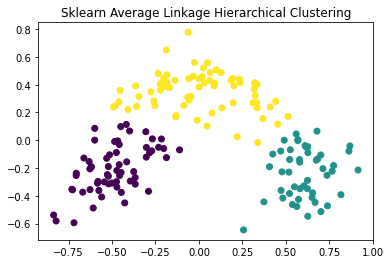

In [31]:
average_clustering = AgglomerativeClustering(n_clusters=3,
                                             linkage='average')

average_cluster = average_clustering.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=average_cluster)
plt.title('Sklearn Average Linkage Hierarchical Clustering')
plt.show()

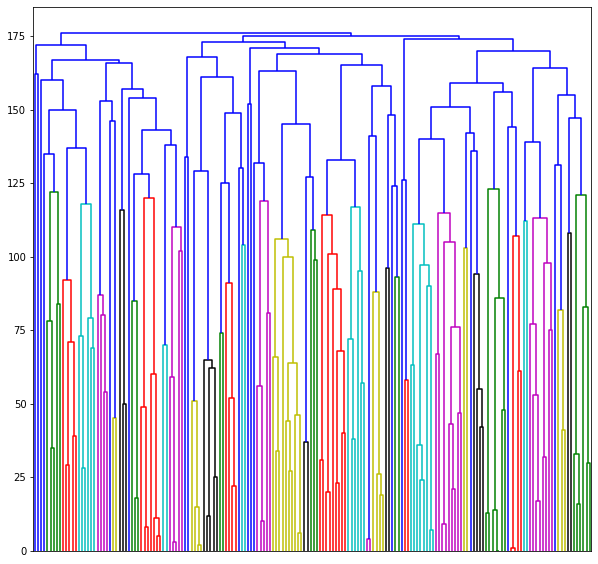

In [32]:
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = average_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = average_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

* 클러스터링 비교하기

1. Single Linkage
    + 두 클러스터 내의 가장 가까운 점을 기준으로 클러스터를 합치기 클러스터 사이의 노이즈에 매우 민감한 특성과 구 형태가 아닌 데이터에 대해 클러스터를 잘 형성한다는 특성이 있습니다.
    + wine 데이터는 모든 데이터가 연결되어 있는 듯한 분포를 가지고 있기 때문에, 각 클러스터의 경계가 모호한 노이즈가 많은 형태를 띠고 있습니다. <br>Single Linkage가 구 형태가 아닌 데이터에 대해 클러스터를 잘 형성한다는 특성이 있지만, 이러한 데이터의 경우 Single Linkage 방법을 사용하면 좋은 클러스터를 생성하기 어렵습니다.

2. Complete Linkage
    + 두 클러스터 내에 가장 먼 점을 기준으로 클러스터를 합치기 때문에 클러스터 사이의 노이즈와 이상치에 민감하지 않은 특성이 있습니다.
    + 노이즈에 민감하지 않다는 특성을 가진 Complete Linkage가 좋은 성능을 보여주었습니다. 
    
3. Average Linkage
    + Single Linkage와 Complete Linkage의 중간쯤에 위치한 Average Linkage가 가장 괜찮은 형태의 클러스터를 형성한 것을 확인할 수 있습니다. 

### DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

* DBSCAN은 데이터의 밀도를 기반으로 한 클러스터링 기법으로 점을 중심으로 반경(epsilon) 내에 minPth 만큼의 점이 존재한다면 그 점을 중심으로 군집을 형성합니다.

* DBSCAN의 특징은 클러스터 개수를 정의할 필요가 없으며, 비 선형적 클러스터링이 가능하고, 노이즈에 강하며 사용하는 데이터의 순서에 따라 클러스터링이 달라질 수 있다는 점입니다.

In [36]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

In [37]:
dbscan_cluster = dbscan.fit_predict(data)

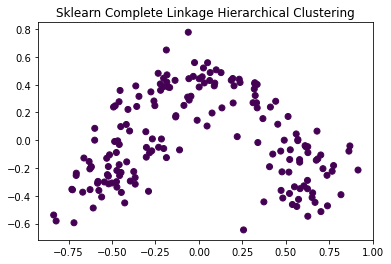

In [38]:
plt.scatter(data[:, 0], data[:, 1], c=dbscan_cluster)
plt.title('Sklearn Complete Linkage Hierarchical Clustering')
plt.show()

* 클러스터링 알고리즘 비교하기

In [39]:
from sklearn import datasets
n_samples = 1500

noisy_circles_data, _ = datasets.make_circles(n_samples = n_samples, factor=.5, noise=.05)
noisy_moons_data, _ = datasets.make_moons(n_samples = n_samples, noise=.05)

1) KMeans

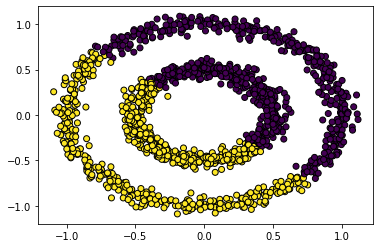

In [41]:
kmeans = KMeans(n_clusters=2)
kmeans_cluster = kmeans.fit_predict(noisy_circles_data)

plt.scatter(noisy_circles_data[:, 0], noisy_circles_data[:, 1],
            c=kmeans_cluster, linewidth=1, edgecolor='black')
plt.show()

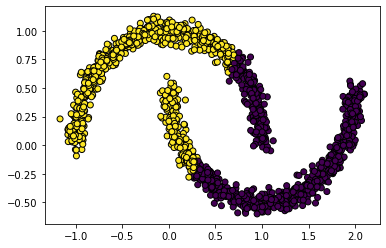

In [43]:
kmeans_cluster = kmeans.fit_predict(noisy_moons_data)

plt.scatter(noisy_moons_data[:, 0], noisy_moons_data[:, 1],
            c=kmeans_cluster, linewidth=1, edgecolor='black')
plt.show()

2) Hierarchical Clustering with Average linkage

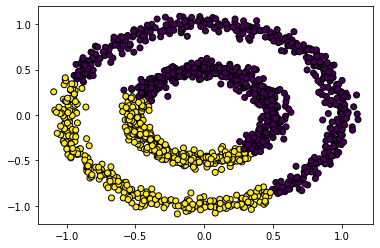

In [46]:
average_clustering = AgglomerativeClustering(linkage='average')
average_cluster = average_clustering.fit_predict(noisy_circles_data)

plt.scatter(noisy_circles_data[:, 0], noisy_circles_data[:, 1],
            c=average_cluster, linewidth=1, edgecolor='black')
plt.show()

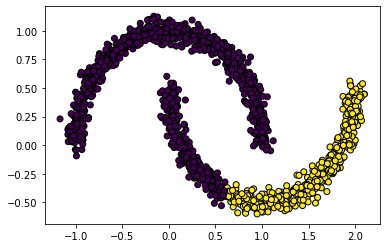

In [47]:
average_cluster = average_clustering.fit_predict(noisy_moons_data)

plt.scatter(noisy_moons_data[:, 0], noisy_moons_data[:, 1], c=average_cluster, linewidth=1, edgecolor='black')
plt.show()

3) DBSCAN

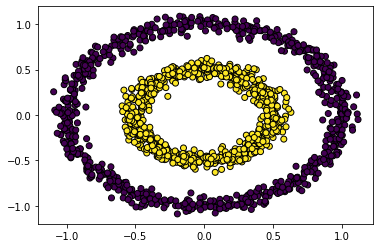

In [48]:
dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan_cluster = dbscan.fit_predict(noisy_circles_data)

plt.scatter(noisy_circles_data[:, 0], noisy_circles_data[:, 1], c=dbscan_cluster, linewidth=1, edgecolor='black')
plt.show()

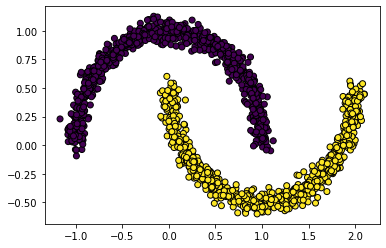

In [49]:
dbscan_cluster = dbscan.fit_predict(noisy_moons_data)

plt.scatter(noisy_moons_data[:, 0], noisy_moons_data[:, 1], c=dbscan_cluster, linewidth=1, edgecolor='black')
plt.show()

#### Evaluation - Silhouette 실루엣 계수

* 실루엣 계수는 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한지를 나타냅니다.
* 실루엣 값이 1에 근접한다는 것은 같은 클러스터 내의 평균거리가 다른 클러스터와의 평균거리보다 가깝다는 것을 알 수 있습니다.
* 일반적으로 실루엣 계수가 0.5 이상이면 클러스터가 잘 된 것으로 판단합니다.

In [51]:
# kmeans

from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2, 11):
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)
  score = silhouette_score(data, cluster)

  print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
  if score > best_score :
    best_n = n_cluster
    best_score = score

print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))

클러스터의 수 : 2, 실루엣 점수 : 0.49
클러스터의 수 : 3, 실루엣 점수 : 0.57
클러스터의 수 : 4, 실루엣 점수 : 0.49
클러스터의 수 : 5, 실루엣 점수 : 0.45
클러스터의 수 : 6, 실루엣 점수 : 0.43
클러스터의 수 : 7, 실루엣 점수 : 0.40
클러스터의 수 : 8, 실루엣 점수 : 0.39
클러스터의 수 : 9, 실루엣 점수 : 0.39
클러스터의 수 : 10, 실루엣 점수 : 0.38
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.57


In [52]:
# Avearge Linkage Hierarchical Clustering
best_n = 1
best_score = -1

for n_cluster in range(2, 11):
  average_clustering = AgglomerativeClustering(n_clusters=n_cluster)
  cluster = average_clustering.fit_predict(data)
  score = silhouette_score(data, cluster)

  print('클러스터의 수 : {}, 실루엣 점수 : {:.2f}'.format(n_cluster, score))
  if score > best_score:
    best_n = n_cluster
    best_score = score

print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.2f}'.format(best_n, best_score))

클러스터의 수 : 2, 실루엣 점수 : 0.46
클러스터의 수 : 3, 실루엣 점수 : 0.54
클러스터의 수 : 4, 실루엣 점수 : 0.48
클러스터의 수 : 5, 실루엣 점수 : 0.45
클러스터의 수 : 6, 실루엣 점수 : 0.42
클러스터의 수 : 7, 실루엣 점수 : 0.39
클러스터의 수 : 8, 실루엣 점수 : 0.37
클러스터의 수 : 9, 실루엣 점수 : 0.38
클러스터의 수 : 10, 실루엣 점수 : 0.37
가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.54
